# ETUDE DES RESEAUX DE NEURONES
### Etude de cas : Machine Learning with Cancer dataset using RNN
**Source** : https://www.kaggle.com/code/pitchumca/machine-learning-with-cancer-dataset-using-rnn/notebook

# Contexte

Le cancer du sein est l'un des cancers les plus répandus chez les femmes à travers le monde. Il existe deux phases principales de ce cancer : maligne (cancéreuse) et bénigne (non cancéreuse). La distinction entre ces deux phases est cruciale pour le diagnostic et le traitement approprié des patients. <br>

Ce dataset vise à fournir une base de données robuste pour la prédiction de la phase du cancer du sein. Il comprend une variété de caractéristiques cliniques et histologiques qui ont été collectées à partir de biopsies de tissus mammaires. Ces caractéristiques comprennent des mesures telles que la taille de la tumeur, la forme des cellules, l'uniformité de la taille des cellules, la finesse du contour cellulaire, etc <br>

Chaque entrée dans le dataset représente une biopsie de tissu mammaire prélevée sur une patiente, avec des caractéristiques spécifiques associées à cette biopsie. La variable cible est la phase du cancer du sein, qui est étiquetée comme maligne ou bénigne. <br>

L'objectif de ce dataset est de développer des modèles de prédiction précis qui peuvent utiliser les caractéristiques fournies pour prédire avec précision la phase du cancer du sein. Ces modèles pourraient potentiellement aider les médecins et les cliniciens à prendre des décisions éclairées sur le diagnostic et le traitement des patients, en identifiant rapidement les cas suspects nécessitant une attention médicale immédiate. En conséquence, cela pourrait contribuer à améliorer les taux de survie et la qualité de vie des patients atteints de cancer du sein.

# Problématique

Le cancer du sein est l'une des principales causes de décès chez les femmes à travers le monde, et le dépistage précoce ainsi que la classification précise de la phase du cancer sont essentiels pour un traitement efficace. La problématique centrale de ce dataset est de développer des modèles de prédiction robustes capables de distinguer avec précision entre les phases maligne et bénigne du cancer du sein à partir de données cliniques et histologiques.

# Analyse descriptive

In [ ]:
# Importation des librairies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import sklearn as sk 

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics 

In [2]:
# Chargement du dataset
data = pd.read_csv("cancer_data.csv", header=0)

In [3]:
# Aperçu du dataset (affiche les 3 premières lignes)
data.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Description des attributs

1. **id** <br>
2. **diagnosis** : C'est le diagnostic des tissus mammaires (M = maligne, B = bénigne) <br>
3. **radius_mean** : moyenne des distances entre le centre et les points du périmètre <br>
4. **texture_mean** : écart-type des valeurs en niveaux de gris. C'est une caractéristique extraite à partir d'images obtenues par des techniques telles que la mammographie ou l'échographie <br>
5. **perimeter_mean** : taille moyenne de la tumeur centrale <br>
6. **area_mean** : représente généralement la moyenne de la zone (ou surface) des anomalies ou des lésions détectées dans les images mammographiques ou échographiques <br>
7. **smoothness_mean** : moyenne de la variation locale de la longueur des rayons <br>
8. **compactness_mean** : fournit une mesure numérique de la relation entre la zone (ou la surface) et le périmètre d'une anomalie ou d'une lésion. Une valeur élevée de "compactness_mean" peut indiquer que la zone de tissu anormal est relativement compacte, avec un périmètre plus petit par rapport à sa taille, ce qui peut être associé à des caractéristiques malignes. <br>
9. **concavity_mean**: moyenne de la gravité des parties concaves du contour <br>
10. **concave points_mean** : Plus précisément, les points concaves sont des points où le contour d'une anomalie ou d'une lésion présente une indentation vers l'intérieur, formant des creux ou des concavités. "concave points_mean" fournit une mesure numérique de la moyenne de ces points concaves dans une région donnée de la lésion <br>
11. **texture_worst** : la "pire" ou la plus grande valeur moyenne de l'écart-type des valeurs en niveaux de gris <br>
12. **perimeter_worst** :  mesure du périmètre le plus grand autour des anomalies ou des lésions dans le sein, et elle est utilisée comme caractéristique importante dans les modèles de prédiction du cancer du sein pour aider à évaluer la gravité potentielle des anomalies détectées. <br>
13. **area_worst** : fournit une mesure numérique de la plus grande surface parmi toutes les observations disponibles. <br>
14. **smoothness_worst** : la "pire" valeur moyenne ou la plus grande pour la variation locale des longueurs de rayon <br>
15. **compactness_worst** : évalue à quel point une anomalie ou une lésion est compacte ou dense par rapport à sa forme et à sa taille. <br>
16. **concavity_worst** : évalue la présence et l'ampleur des concavités ou des indentations vers l'intérieur le long des bords de l'anomalie ou de la lésion. <br>
17. **concave points_worst** :  évalue la présence et la distribution des points concaves, qui sont des points où le contour présente une indentation vers l'intérieur. <br>
18. **symmetry_worst** :  évalue à quel point une anomalie ou une lésion est symétrique par rapport à un axe ou un plan. <br>
19. **fractal_dimension_worst** :  évalue la complexité et la rugosité des contours, en mesurant la manière dont leur structure se répète à différentes échelles <br>
20. **radius_worst** : il s'agit du rayon le plus grand mesuré pour les anomalies ou les lésions <br>
21. **symmetry_mean** : c'est une mesure de la symétrie moyenne des anomalies ou des lésions. Cela évalue à quel point elles sont symétriques par rapport à un axe ou un <br>
22. **fractal_dimension_mean** : Cette caractéristique représente la dimension fractale moyenne des contours des anomalies ou des lésions <br>
23. **radius_se** : Il s'agit de l'erreur standard du rayon des anomalies ou des lésions. Cela indique la variabilité des mesures de rayon. <br>
24. **texture_se** : C'est l'erreur standard de la texture des anomalies ou des lésions. Cela indique la variabilité des mesures de texture. <br>
25. **perimeter_se** : Il s'agit de l'erreur standard du périmètre des anomalies ou des lésions. Cela indique la variabilité des mesures de périmètre. <br>
26. **area_se** : C'est l'erreur standard de la zone des anomalies ou des lésions. Cela indique la variabilité des mesures de zone. <br>
27. **smoothness_se** : Il s'agit de l'erreur standard de la douceur des anomalies ou des lésions. Cela indique la variabilité des mesures de douceur.
28. **compactness_se** : C'est l'erreur standard de la compacité des anomalies ou des lésions. Cela indique la variabilité des mesures de compacité. <br>
29. **concavity_se** : Il s'agit de l'erreur standard de la concavité des anomalies ou des lésions. Cela indique la variabilité des mesures de concavité. <br>
30. **concave points_se** : Il s'agit de l'erreur standard des points concaves des anomalies ou des lésions. Cela indique la variabilité des mesures de points concaves.
31. **symmetry_se** : C'est l'erreur standard de la symétrie des anomalies ou des lésions. Cela indique la variabilité des mesures de symétrie. <br>
32. **fractal_dimension_se** : Il s'agit de l'erreur standard de la dimension fractale des anomalies ou des lésions. Cela indique la variabilité des mesures de dimension fractale.


## Information sur le dataset 

In [4]:
# Prévisualisation des type de données de notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**EXPLICATION** <br>
Par exemple, la ligne *diagnosis 569 non-null object* signifie que le "diagnosis" a une valeur de 569 de type objet <br>
Nous pouvons remarquer que la colonne "Unnamed: 32" contient 0 objet non nul, ce qui signifie que toutes les valeurs sont nulles dans cette colonne. Par conséquent, nous ne pouvons pas l'utiliser pour notre analyse. 

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# Elimination de la colonne ID et Unnamed: 32
data.drop(data.columns[[1]], axis=1)

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0           0.2419  ...          17.33           184.60      2019.0   
1           0.1812  ...          23.41           158.80      1956.0   
2           0.2069  ...          25.53           152.50      1709.0   
3           0.2597  ...          26.50            98.87       567.7   
4           0.1809  ...          16.67           152.20      1575.0   
..             ...  ...            ...              ...         ...   
564         0.1726  ...          26.40           166.10      2027.0   
565         0.1752  ...          38.25           155.00      1731.0   
566         0.1590  ...          34.12           126.70      1124.0   
567         0.2397  ...          39.42           184.60      1821.0   
568         0.1587  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06

In [7]:
# Divisons les variables selon leur category
features_mean= list(data.columns[1:12])
features_se= list(data.columns[12:22])
features_worst=list(data.columns[22:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [8]:
# commençons maintenant avec features_mean 
# maintenant, comme vous le savez, notre colonne de diagnostic est un type d'objet, 
# nous pouvons donc la faire correspondre à une valeur entière
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

## Statistique descriptive 

In [9]:
data.describe()

id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.300000         0.086370          0.064920        0.029560   
50%     551.100000         0.095870          0.092630        0.061540   
75%     782.700000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       concave points_mean  ...  texture_worst  perimeter_worst   area_worst  \
count           569.000000  ...     569.000000       569.000000   569.000000   
mean              0.048919  ...      25.677223       107.261213   880.583128   
std               0.038803  ...       6.146258        33.602542   569.356993   
min               0.000000  ...      12.020000        50.410000   185.200000   
25%               0.020310  ...      21.080000        84.110000   515.300000   
50%               0.033500  ...      25.410000        97.660000   686.500000   
75%               0.074000  ...      29.720000       125.400000  1084.000000   
max               0.201200  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 33 columns]

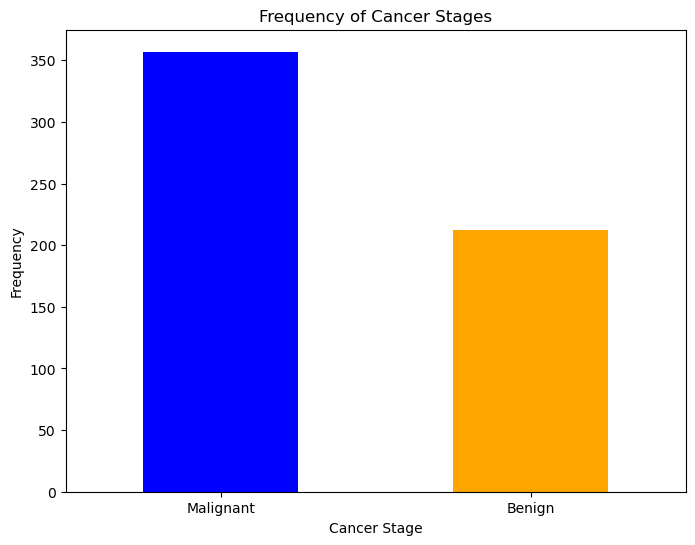

In [10]:
# Fréquence des stades du cancer
frequency = data['diagnosis'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
frequency.plot(kind='bar', color=['blue', 'orange'])
plt.title('Frequency of Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Malignant', 'Benign'], rotation=0)
plt.show()

# Analyse diagnostique

Sur ce graphe, nous pouvons constater qu'il y a un nombre important de cas bénigne (non cancéreux) qui peuvent être traité.

Dans la suite, nous allons établir la corrélation entre les variables afin de réduire les variables qui présentent une forte dépendance entre. Nous allons effectuer cette analyse uniquement pour les features_mean, puis nous le ferons pour les autres et nous verrons celle qui est le plus performant.

<Axes: >

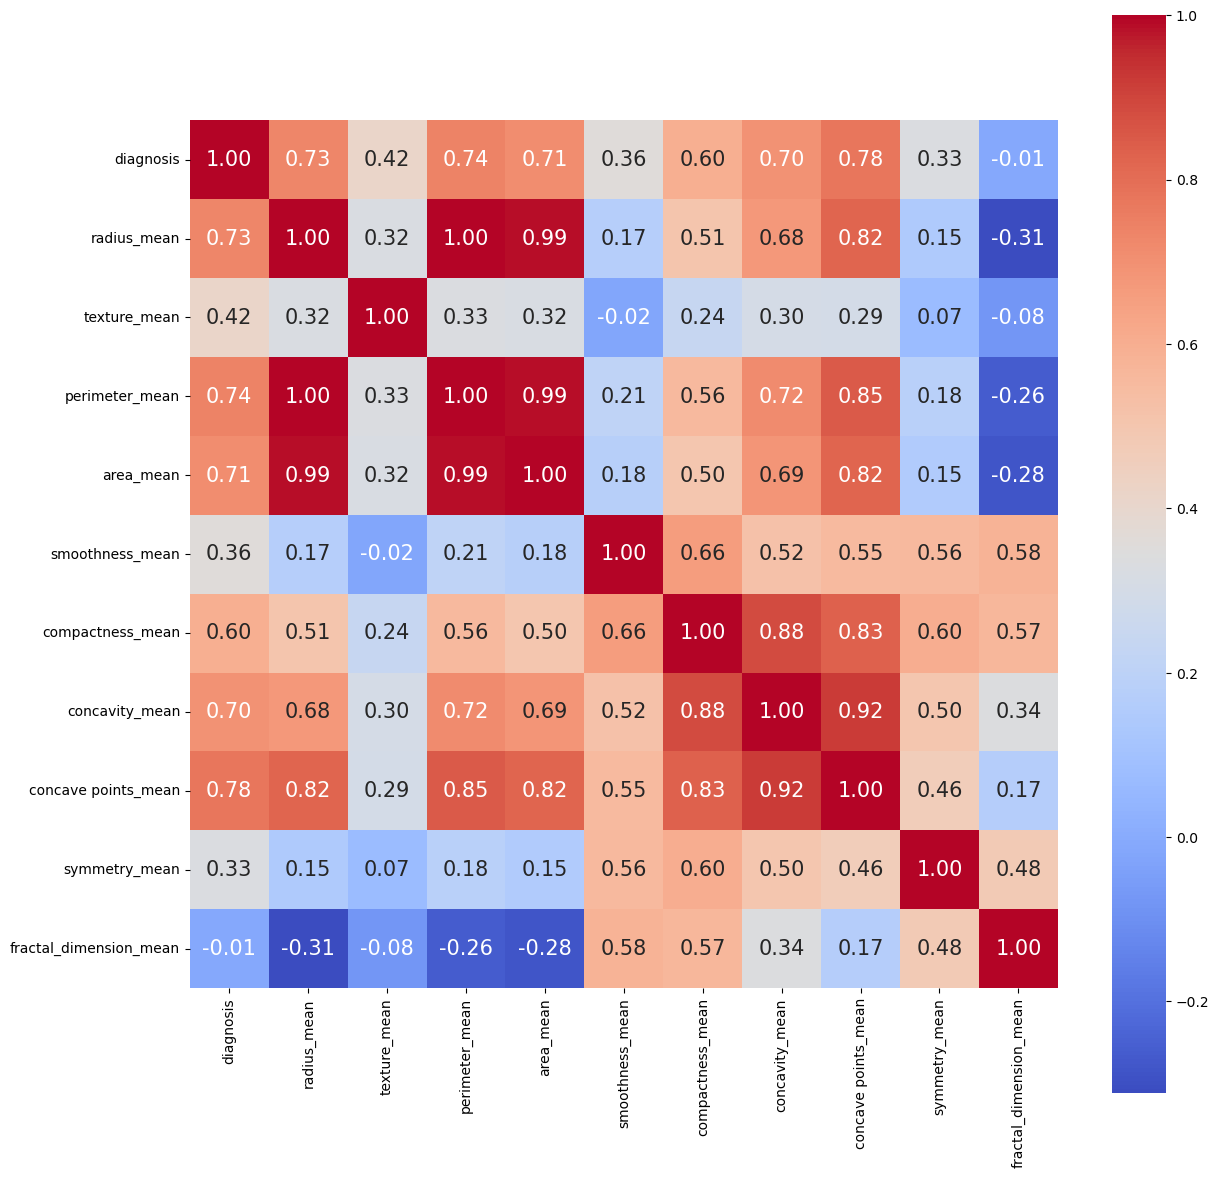

In [11]:
# Correlation
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True, square=True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

**Observation** <br>
- Le rayon, le paramètre et l'aire sont fortement corrélés, comme le prévoit leur relation, de sorte que nous utiliserons n'importe lequel d'entre eux. <br>
- compactness_mean, concavity_mean et concave point_mean sont fortement corrélés, nous utiliserons donc compactness_mean à partir de maintenant.
- En résumé, les paramètres que nous allons maintenir sont : perimeter_mean, texture_mean, compactness_mean, symmetry_mean

In [12]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

Nous allons séparer nos données en données d'apprentissage et de test de validation

In [13]:
# Données d'apprentissage et test de validation
train, test = train_test_split(data, test_size = 0.3)

print(train.shape)
print(test.shape)

(398, 33)
(171, 33)


# Analyse Prédictive

In [14]:
# Entrainement
train_X = train[prediction_var]
train_y=train.diagnosis

# Test
test_X= test[prediction_var] 
test_y =test.diagnosis 

## Méhode des forêts aléatoires (Random Forest)

In [15]:
# n_estimators spécifie le nombre d'arbres de décision à créer dans la forêt. 
# Dans ce cas, nous créeons une forêt aléatoire avec 100 arbres de décision
model = RandomForestClassifier(n_estimators=100)

In [16]:
model.fit(train_X,train_y)

RandomForestClassifier()

In [17]:
prediction=model.predict(test_X)   # Prediction pour les données de test

Nous utiliserons ici la mesure de la précision entre notre valeur prédite et les valeurs de sortie de notre test.

In [18]:
metrics.accuracy_score(prediction,test_y)

0.9239766081871345

## Méthode Support Vector Machine

In [19]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8888888888888888

Le SVM ne donne que 0,88, ce que nous pouvons améliorer en utilisant différentes techniques. <br>
Maintenant, faisons cela pour tous les feature_mean afin que la forêt aléatoire nous permette d'obtenir les caractéristiques qui sont importantes.

In [20]:
prediction_var = features_mean

In [21]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [22]:
model=RandomForestClassifier(n_estimators=100)

In [23]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

1.0

En tenant compte de toutes les caractéristiques, la précision augmente. Par ailleurs, vérifions maintenant les caractéristiques importantes de la prédiction.

In [24]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

diagnosis                 0.394303
concave points_mean       0.142659
perimeter_mean            0.127426
area_mean                 0.120640
radius_mean               0.076523
concavity_mean            0.067606
texture_mean              0.032071
compactness_mean          0.016282
smoothness_mean           0.009570
symmetry_mean             0.007306
fractal_dimension_mean    0.005615
dtype: float64


Considérons à présent tous les features en utilisant la méthode SVM

In [25]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8830409356725146

Comme vous pouvez le voir, la précision du SVM a fortement diminué. <br>
Maintenant, prenons seulement les 5 caractéristiques les plus importantes données par le classificateur RandomForest

In [26]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']

In [27]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [28]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9181286549707602

In [29]:
# SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8771929824561403

On constate que la multi colinéarité affecte beaucoup notre partie SVM, mais elle n'affecte pas tellement le "Random Forest" parce que pour random forest nous n'avons pas besoin de faire autant d'efforts pour notre partie d'analyse. <br>
Maintenant, nous allons traiter la troisième partie des données (worst)

In [30]:
prediction_var = features_worst

In [31]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [32]:
# SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9064327485380117

In [33]:
# Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9649122807017544

La précision de RandomForest augmente, ce qui signifie que les valeurs sont plus homogènes dans la partie Worst. Obtenons les caractéristiques importantes.

In [34]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

area_worst              0.239693
perimeter_worst         0.214220
concave points_worst    0.197430
radius_worst            0.184135
texture_worst           0.046934
concavity_worst         0.036935
compactness_worst       0.030441
symmetry_worst          0.028807
smoothness_worst        0.021405
dtype: float64


In [35]:
prediction_var = ['concave points_worst','radius_worst','area_worst','perimeter_worst','texture_worst'] 

In [36]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [37]:
# Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9473684210526315

In [38]:
# SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9064327485380117

A ce point en déduit que la méthode Random Forest serait idéale pour la prédiction

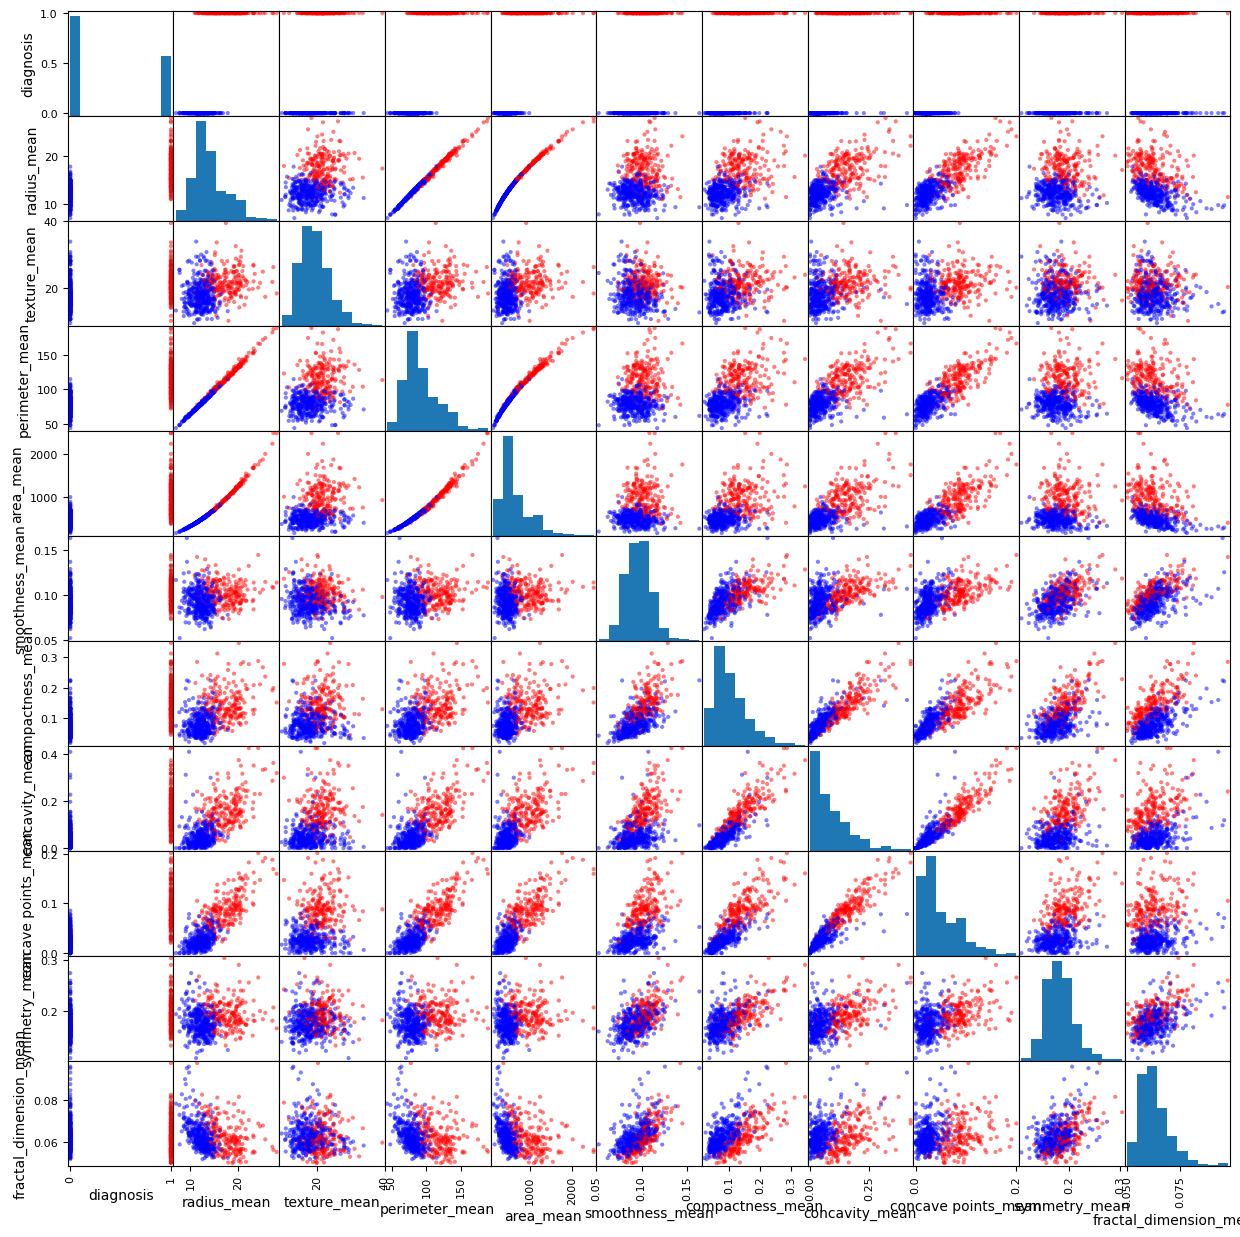

In [39]:
# Commençons avec l'analyse des données features_mean
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); 

**Observation** <br>
- Le rayon, la surface et le périmètre ont une forte relation linéaire, comme prévu. <br>
- Comme le montre le graphique, les caractéristiques telles que texture_mean, smoothness_mean, symmetry_mean et fractal_dimension_mean ne peuvent pas être utilisées pour classer deux catégories parce que les deux catégories sont mélangées et qu'il n'y a pas de plan séparable. Par conséquence, nous pouvons les éliminer de nos variables de prédiction.

In [40]:
features_mean

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [41]:
# Les variables de prédiction 
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

## Validation croisée (Cross-Validation) 

In [42]:
def model(model,data,prediction,outcome):
    # En utilisant la validation croisée K-Fold avec 10 plis, 
    # l'ensemble de données sera divisé en 10 sous-ensembles. 
    # Le modèle sera entraîné et évalué 10 fois, chaque fois en utilisant 
    # un sous-ensemble différent comme ensemble de test et les données restantes 
    # comme ensemble d'entraînement. Cela aide à évaluer les performances du modèle 
    # de manière plus fiable en réduisant l'impact de la variabilité dans les ensembles d'entraînement et de test.
    kf = KFold(data.shape[0], n_folds=10)

In [43]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [44]:
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    #Print accuracy
    # now checkin accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print(data.shape[0])
 
   # sklearn.model_selection.KFold(n_splits=3, shuffle=False, random_state=None)
    kf = KFold(data.shape[0],shuffle=True, random_state = 100)
    
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

Dans la suite de notre analyse, nous allons utilisé différents modèles d'apprentissage

In [46]:
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(train_X, train_y)

#Predict the response for test dataset
y_pred = clf.predict(test_X)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_y, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.9415204678362573
Precision: 0.9344262295081968
Recall: 0.9047619047619048


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Création du modèle Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_X, train_y)

# Prédiction sur les données de test
y_pred_rf = rf_clf.predict(test_X)

# Évaluation du modèle
print("Accuracy:", metrics.accuracy_score(test_y, y_pred_rf))
print("Precision:", metrics.precision_score(test_y, y_pred_rf))
print("Recall:", metrics.recall_score(test_y, y_pred_rf))

## RNN

In [49]:
#RNN
import numpy as np
import matplotlib.pyplot as plt
import numpy
from keras.layers import Activation, Dense
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Embedding
from keras.preprocessing import sequence
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from keras.layers import LeakyReLU
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
import keras
from sklearn.metrics import mean_squared_error

In [50]:
train_X = train_X/255.0
test_X = test_X/255.0

print(train_X.shape)
model = Sequential()
dim = train_X.shape[1]
print(dim)

#Layer 1
model.add(Dense(32, input_dim = dim))
model.add(LeakyReLU())
model.add(Dropout(0.25))

#Layer 2
model.add(Dense(32))
model.add(LeakyReLU())
model.add(Dropout(0.25))

#output layer
#model.add(Dense(2))
#model.add(Dense(1, activation='relu'))
#model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = "rmsprop",loss = "binary_crossentropy",metrics = ["accuracy"])

#Fit/Train the model
bsize = 32  
model.fit(train_X, train_y, batch_size = bsize, epochs = 50, verbose = 1,validation_data = (test_X, test_y))

(398, 5)

5

Epoch 1/50


13/13 [==============================] - 2s 31ms/step - loss: 0.7522 - accuracy: 0.4925 - val_loss: 0.6532 - val_accuracy: 0.4152
Epoch 2/50
13/13 [==============================] - 0s 8ms/step - loss: 0.6629 - accuracy: 0.5678 - val_loss: 0.6310 - val_accuracy: 0.6023
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6621 - accuracy: 0.5879 - val_loss: 0.6134 - val_accuracy: 0.5380
Epoch 4/50
13/13 [==============================] - 0s 8ms/step - loss: 0.6380 - accuracy: 0.6281 - val_loss: 0.5935 - val_accuracy: 0.6316
Epoch 5/50
13/13 [==============================] - 0s 8ms/step - loss: 0.6170 - accuracy: 0.6332 - val_loss: 0.5664 - val_accuracy: 0.8538
Epoch 6/50
13/13 [==============================] - 0s 9ms/step - loss: 0.6087 - accuracy: 0.7060 - val_loss: 0.5528 - val_accuracy: 0.8129
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5594 - accuracy: 0.7764 - val_loss: 0.5411 - val_accuracy: 0.7661
Epoc

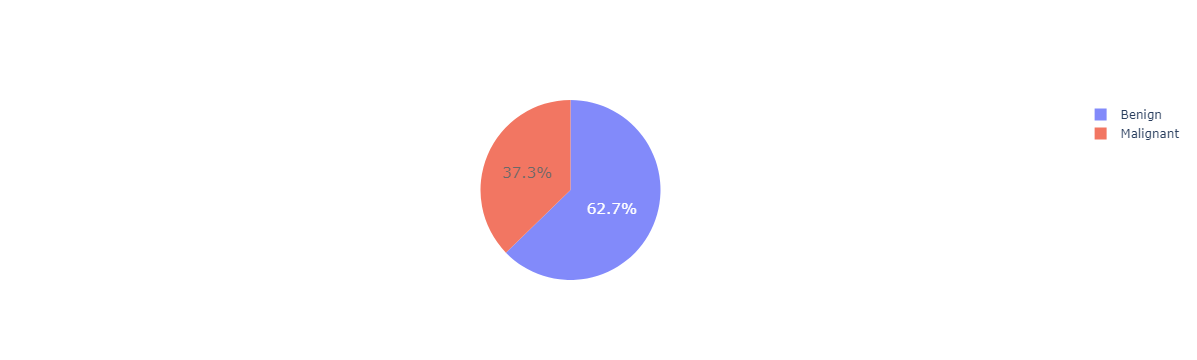

In [58]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()
B, M = data['diagnosis'].value_counts()
trace1 = go.Bar(y = (M, B), x = ['malignant', 'benign'],opacity = 0.8)


trace2 = go.Pie(labels = ['Benign','Malignant'], values = data['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8)


py.iplot([trace2])

In [59]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x=data.iloc[:,1:]

#normalize x
x=(x-np.min(x))/(np.max(x)-np.min(x))

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

updated cost is 0.6953267931839913
updated cost is 0.09291259877426715
updated cost is 0.04755776995011952


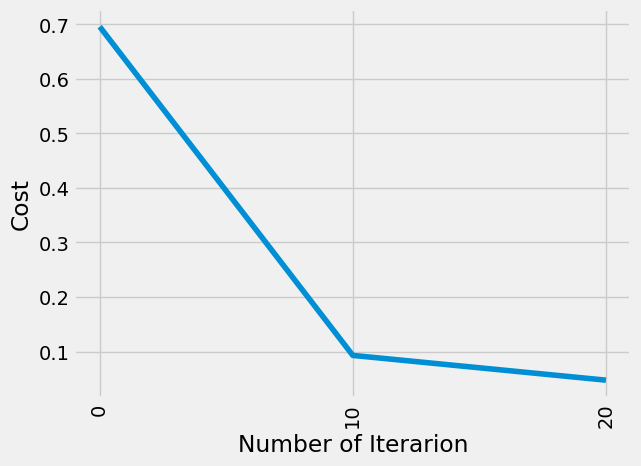

Accuracy: 100.0 %


In [61]:
def initial(dimension):
    w= np.full([dimension,1],0.01)
    b=0
    return w,b
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head
def ForwardBackward(w,b,x_train,y_train):
    z= np.dot(w.T,x_train)+b
    y_head = sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients
def Update(w,b,x_train,y_train,learning,itnumber):
    index=[]
    cost_list=[]
    for i in range(itnumber):
        cost,gradients=ForwardBackward(w,b,x_train,y_train)
        w=w-learning*gradients["derivative_weight"]
        b=b-learning*gradients["derivative_bias"]
        if(i%10==0):
            cost_list.append(cost)
            index.append(i)
            print("updated cost is {}".format(cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, cost_list
def Predict(w,b,x_test):
    z=np.dot(w.T,x_test)+b
    z_=sigmoid(z)
    y_predict=np.zeros((1,x_test.shape[1]))
    for i in range(z_.shape[1]):
        if z[0,i]<=0.5:
            y_predict[0,i]=0
        else:
            y_predict[0,i]=1
    return y_predict


    
def LogReg(x_train,y_train,x_test,y_test,learning,itnumber):
    dim=x_train.shape[0]
    w,b = initial(dim)
    parameters,cost_list=Update(w,b,x_train,y_train,learning,itnumber)
    y_predict=Predict(parameters["weight"],parameters["bias"],x_test)
    print("Accuracy: {} %".format(100 - np.mean(np.abs(y_predict - y_test)) * 100))
import matplotlib.pyplot as plt
LogReg(x_train,y_train,x_test,y_test,learning=1,itnumber=30)

updated cost is 0.6953267931839913
updated cost is 0.05298111251956968
updated cost is 0.027173994192462053
updated cost is 0.01826858124827769
updated cost is 0.013759153656931623
updated cost is 0.011035390069443167
updated cost is 0.009212001547349667
updated cost is 0.007905875886348106
updated cost is 0.006924246608479768
updated cost is 0.006159544359450333
updated cost is 0.005547013303360968
updated cost is 0.005045339039131164
updated cost is 0.00462692187666321
updated cost is 0.00427262207639671
updated cost is 0.0039687491132555115
updated cost is 0.0037052512496786334
updated cost is 0.0034745819187050114
updated cost is 0.003270965044902953
updated cost is 0.00308990458752865
updated cost is 0.002927848563307415
updated cost is 0.0027819536143169447
updated cost is 0.0026499166845552606
updated cost is 0.0025298525001956154
updated cost is 0.0024202029430861675
updated cost is 0.002319669034355573
updated cost is 0.0022271592097458056
updated cost is 0.002141749508734533


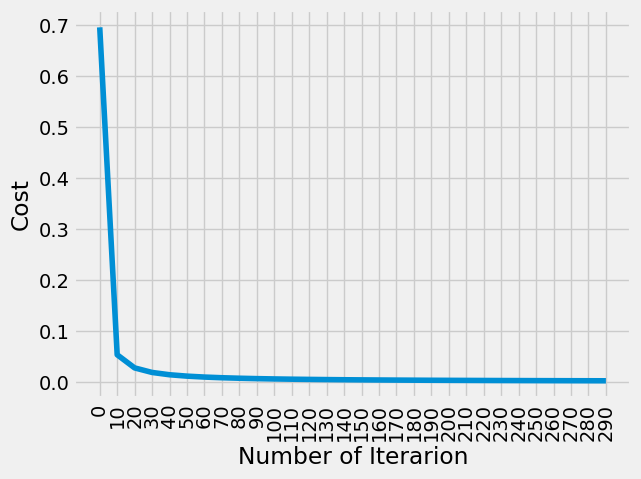

Accuracy: 100.0 %


In [62]:
LogReg(x_train,y_train,x_test,y_test,learning=1.7,itnumber=300)

In [63]:
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('model', model)
])

param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25, 30],
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

In [64]:
model = xgb.XGBClassifier()

pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('model', model)
])

param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25, 30],
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

In [65]:
grid.fit(train_X, train_y)

C:\Users\Noutataa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


375 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Noutataa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Noutataa\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Noutataa\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_polic...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [2, 3, 5, 7, 10],
                         'model__n_estimators': [10, 100, 500],
                         'pca__n_components': [5, 10, 15, 20, 25, 30]},
             scoring='roc_auc')

In [66]:
#Make predictions on training set:
predictions = grid.predict(train_X)
  
    #Print accuracy
    # now checkin accuracy for same data
accuracy = metrics.accuracy_score(predictions,train_y)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 98.995%


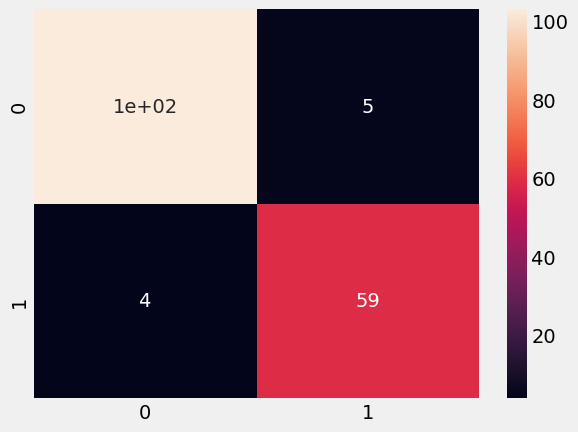

In [67]:
y_pred = grid.predict(test_X)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
import keras
from keras.layers import Input, Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, input_dim=5))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('softmax'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X,train_y, epochs=20, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/20
13/13 [==============================] - 3s 25ms/step - loss: 0.6856 - accuracy: 0.8291 - val_loss: 0.6892 - val_accuracy: 0.6374
Epoch 2/20
13/13 [==============================] - 0s 10ms/step - loss: 0.6757 - accuracy: 0.8844 - val_loss: 0.6862 - val_accuracy: 0.6608
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.6660 - accuracy: 0.9020 - val_loss: 0.6834 - val_accuracy: 0.6667
Epoch 4/20
13/13 [==============================] - 0s 9ms/step - loss: 0.6557 - accuracy: 0.9221 - val_loss: 0.6801 - val_accuracy: 0.6608
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.6461 - accuracy: 0.9171 - val_loss: 0.6755 - val_accuracy: 0.6491
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.6376 - accuracy: 0.9246 - val_loss: 0.6671 - val_accuracy: 0.7544
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.6278 - accuracy: 0.9246 - val_loss: 0.6632 - val_accuracy: 0.7076
Epoch 8/20
13/13 [

6/6 [==============================] - 0s 2ms/step


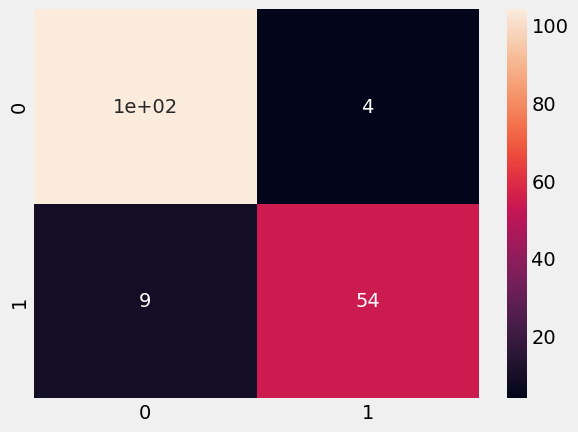

In [70]:
y_pred = model.predict(test_X)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [71]:
# Testing Options
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
seed = 8
scoring = 'accuracy'

# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = None)
    cv_results = model_selection.cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


KNN: 0.924615 (0.040399)
SVM: 0.924679 (0.040398)


In [72]:
# Make predictions on validation dataset
from sklearn.metrics import classification_report

In [73]:
from sklearn.svm import SVC
clf = SVC()

clf.fit(train_X, train_y)
accuracy = clf.score(test_X, test_y)
print(accuracy)

0.9064327485380117


In [74]:
predictions = clf.predict(test_X)
#print(name)
print(accuracy_score(test_y, predictions))
print(classification_report(test_y, predictions))

0.9064327485380117
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       108
           1       0.93      0.81      0.86        63

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.90       171



- L'algorithme RNN (Réseau de Neurones Récurrent) dans ce projet est utilisé pour effectuer une classification binaire
- afin de prédire si une tumeur est maligne ou bénigne à partir des caractéristiques du dataset.
- Il apprend à partir des données d'entraînement (train_X, train_y) et évalue ses performances sur les données de test (test_X, test_y).
- Le RNN permet de capturer des relations complexes entre les variables d'entrée, même si dans ce cas les données ne sont pas séquentielles.
- L'objectif est de comparer ses performances à d'autres modèles classiques (Random Forest, SVM, etc.) pour déterminer la méthode la plus efficace.

## Résumé du projet

Ce projet porte sur la classification du cancer du sein à partir d’un jeu de données clinique et histologique, en utilisant différentes méthodes de Machine Learning et de Deep Learning. Le but principal est de prédire si une tumeur est bénigne ou maligne à partir de caractéristiques mesurées lors de biopsies.

### Objectif
L’objectif est de développer des modèles capables de distinguer efficacement les deux phases du cancer du sein (maligne ou bénigne), afin d’aider au diagnostic médical et à la prise de décision clinique.

### Méthodologie
Le projet suit plusieurs étapes :
- **Exploration et préparation des données** : Nettoyage, sélection des variables pertinentes, analyse descriptive et visualisation.
- **Modélisation** : Utilisation de plusieurs algorithmes de classification (Random Forest, SVM, KNN, Réseaux de Neurones, XGBoost, etc.) pour comparer leurs performances.
- **Évaluation** : Mesure de la précision, de la recall, de la matrice de confusion, et validation croisée pour évaluer la robustesse des modèles.
- **Deep Learning** : Implémentation de réseaux de neurones (RNN, LSTM, etc.) pour comparer avec les méthodes classiques.

### Résultats et succès
Les modèles de type Random Forest et XGBoost ont montré de très bonnes performances, avec une précision élevée sur la classification. Les réseaux de neurones donnent aussi de bons résultats, mais nécessitent plus de réglages et de ressources. Le projet montre que la sélection des variables et la gestion de la colinéarité sont importantes pour obtenir de bonnes performances, surtout avec des modèles comme le SVM.

### Enjeux pour un débutant en Deep Learning
Pour un débutant, ce projet permet de comprendre :
- L’importance de la préparation des données et de la sélection des variables.
- Comment comparer différents modèles de Machine Learning et Deep Learning.
- L’impact des choix de modèles et des paramètres sur la performance.
- L’utilité du Deep Learning pour traiter des problèmes complexes, mais aussi ses limites (besoin de données, de réglages, etc.).

Ce projet est un bon exemple pratique pour un cours de Deep Learning, car il couvre tout le cycle d’un projet de classification, de l’analyse exploratoire à l’évaluation des modèles avancés.

# L’étape d’évaluation est bien avancée dans ton notebook :

Tu as mesuré l’accuracy, la précision (precision) et le rappel (recall) pour SVM et Random Forest.
Tu as comparé les résultats des modèles.
Tu as utilisé la validation croisée.
Pour une évaluation complète, tu pourrais encore ajouter :

La matrice de confusion pour visualiser les faux positifs/négatifs.
L’AUC/ROC pour évaluer la performance globale du modèle (surtout en cas de classes déséquilibrées).
L’analyse des erreurs (exemples mal classés).
Un rapport de classification (classification_report de scikit-learn).
Mais l’essentiel de l’évaluation est déjà fait. Ces ajouts sont des bonnes pratiques pour approfondir l’analyse.

**Deep Learning**

Oui, vous pouvez tout à fait utiliser des autoencodeurs et/ou des GANs (Generative Adversarial Networks) pour la génération et la reconstitution de données dans le cadre de ce projet.

**Autoencodeurs**  
- Utilisés pour la réduction de dimensionnalité, la détection d’anomalies, ou la reconstitution de données manquantes.
- Ils apprennent une représentation compacte (encodage) des données, puis essaient de reconstruire les données originales à partir de cet encodage.

**GANs**  
- Utilisés pour générer de nouvelles données synthétiques réalistes à partir de la distribution des données d’origine.
- Ils peuvent servir à augmenter le dataset, équilibrer les classes, ou générer des exemples pour l’analyse.

**Dans votre contexte :**
- Un autoencodeur peut servir à compresser les données patients et à reconstituer les profils, voire à détecter des profils atypiques.
- Un GAN peut générer de nouveaux profils de patients pour augmenter la diversité du dataset ou simuler des cas rares.

**Remarque :**  
Ces approches sont complémentaires à la classification supervisée. Elles sont particulièrement utiles pour :
- L’exploration non supervisée,
- L’augmentation de données,
- La prétraitement (ex : imputation de valeurs manquantes).

**Conclusion :**  
Oui, l’utilisation d’autoencodeurs et/ou de GANs est pertinente et adaptée pour la génération et la reconstitution de données dans votre projet sur Alzheimer.

En résumé :

GANs : pour générer ou augmenter les données.
Autoencodeurs : pour la réduction de dimensionnalité ou la reconstruction de données.